# Olist
## Introduction

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

An order might have multiple items.
Each item might be fulfilled by a distinct seller.
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

## Data Schema

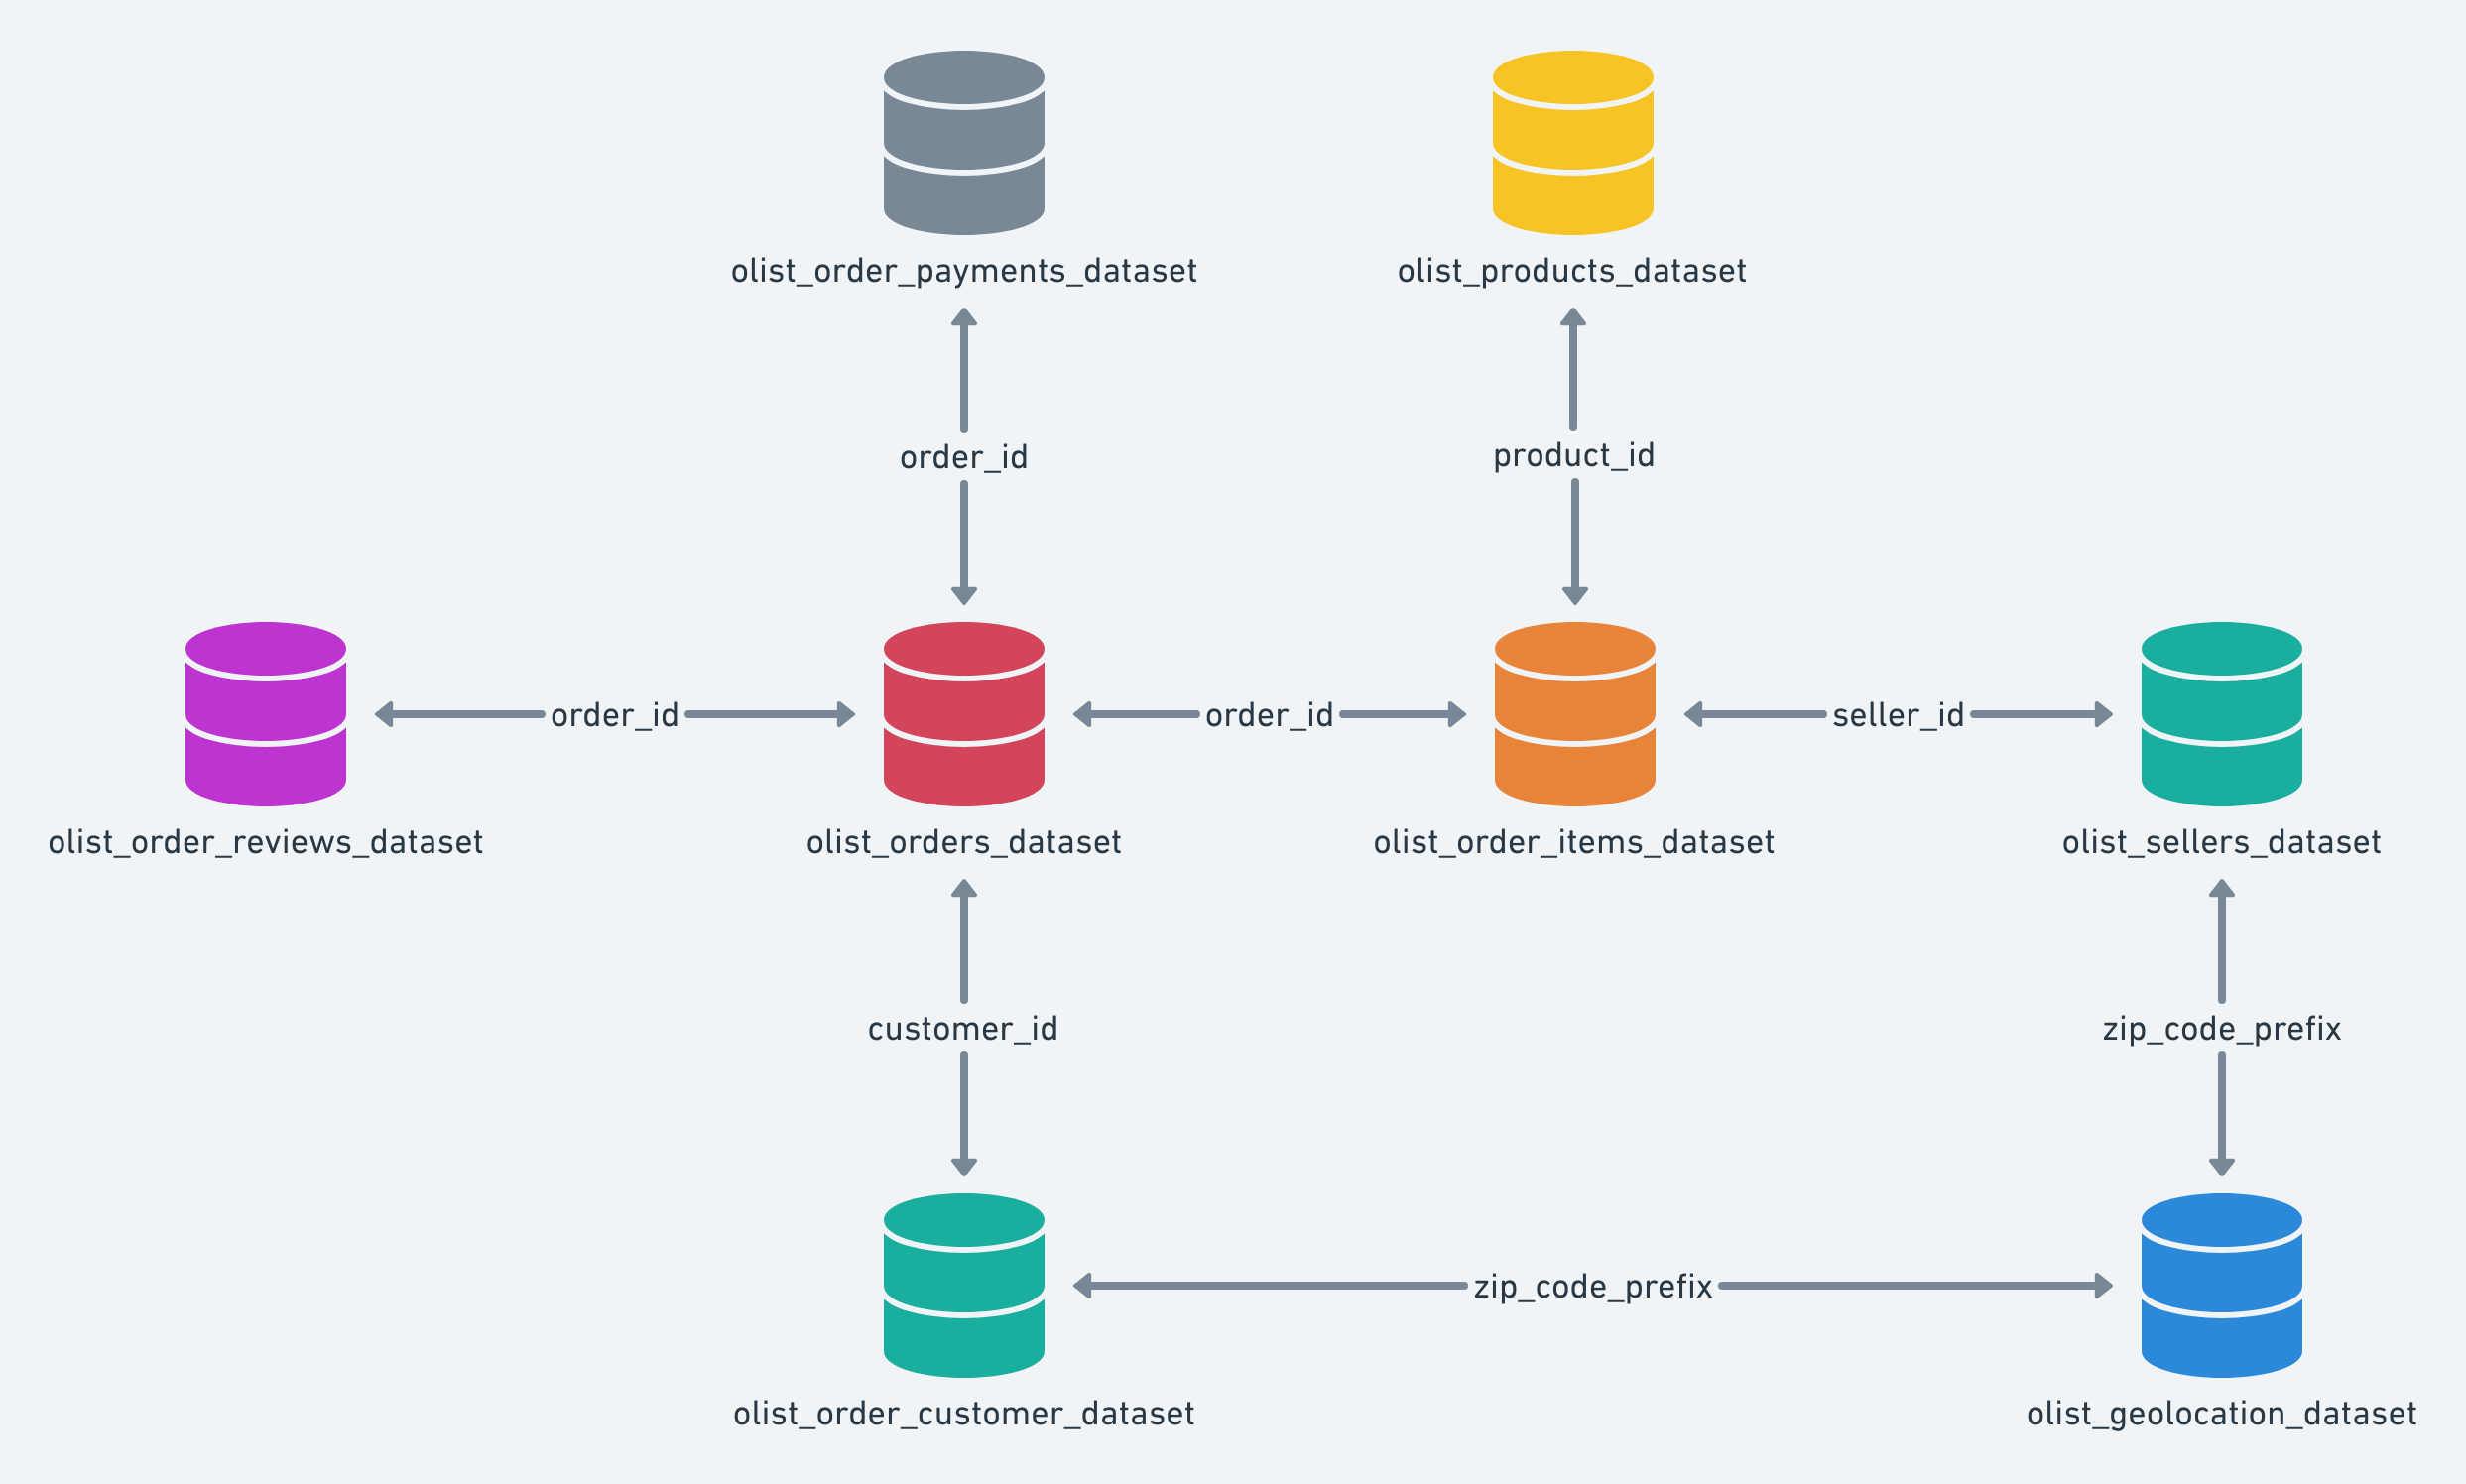

# Challenge

Focus is to explore the dataset and derive recommended actions for Olist.

# Data Exploration

In [1]:
# Importing packages to data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#Package function imports
from olist.order import Order
from olist.seller import Seller

/Users/duc/code/DucVanNgo/data-challenges/04-Decision-Science/olist/../data/csv/


In [3]:
#Importing Olist class from olist.data and using .get_data method to retrieve data.
from olist.data import Olist

#Data is being loaded into data variable which is a dictionary with keys being the file name and values being the data from csv files in a pandas dataframe
data = Olist().get_data()

In [4]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

## Exploring customer data

In [5]:
#Creating a copy of customer data saved as 'customer_data' variable
customer_data = data['customers'].copy()

In [6]:
#Having a first glance at the customer data and structure
customer_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
#Checking if entries if any entries are missing and datatype of each column.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer_data.isna()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
99436,False,False,False,False,False
99437,False,False,False,False,False
99438,False,False,False,False,False
99439,False,False,False,False,False


---

We want to check how many customers there are by region and ideally plot this on a map to understand our customer structure. Thus we will aggregate the customer dataframe by ZIP code and then merge it with geolocation table to get the latitude and longitude for each zip code.

In [42]:
customer_per_city = customer_data.groupby('customer_city').count().drop(columns=['customer_id', 'customer_zip_code_prefix', 'customer_state']).reset_index()

customer_per_city.sort_values('customer_unique_id', ascending=False)[:20]

,customer_city,customer_unique_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [10]:
data['geolocation']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [11]:
geoloc_data = data['geolocation'].copy()
geoloc_data = geoloc_data.groupby('geolocation_city').agg({'geolocation_lat': 'median', 'geolocation_lng': 'median'}).reset_index()


In [12]:
customer_geoloc_merge = pd.merge(customer_per_city,
                                 geoloc_data,
                                 how='left',
                                 left_on = 'customer_city',
                                 right_on = 'geolocation_city').drop(columns='geolocation_city')

In [13]:
customer_geoloc_merge = customer_geoloc_merge.rename(columns={'customer_unique_id': 'customer_count'})

In [54]:
customer_geoloc_merge = customer_geoloc_merge.sort_values('customer_count', ascending=False).reset_index().drop(columns='index').drop(columns='level_0')

In [55]:
customer_geoloc_merge

,customer_city,customer_count,geolocation_lat,geolocation_lng
0,sao paulo,15540,-23.563625,-46.649844
1,rio de janeiro,6882,-22.914532,-43.272798
2,belo horizonte,2773,-19.919393,-43.952598
3,brasilia,2131,-15.817813,-47.937957
4,curitiba,1521,-25.445220,-49.273492
...,...,...,...,...
4114,ibema,1,-25.117551,-53.016138
4115,iaras,1,-22.874423,-49.159285
4116,humildes,1,NaN,NaN
4117,humberto de campos,1,-2.605468,-43.463407


<AxesSubplot:xlabel='customer_city', ylabel='customer_count'>

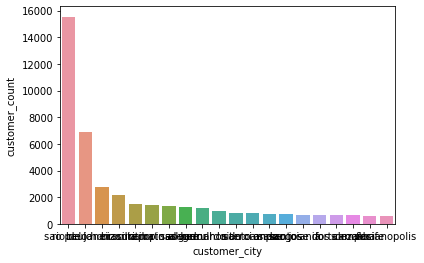

In [57]:
sns.barplot(data=customer_geoloc_merge[:20], x='customer_city', y='customer_count')

In [44]:
#Visualizing on a map the distribution of customers across South America
px.scatter_geo(customer_geoloc_merge,
               lat='geolocation_lat',
               lon='geolocation_lng',
               size='customer_count',
               #color='customer_count',
               scope='south america')


Majority of customers are coming from Sao Paolo

## Check what's driving low reviews

---

As Olist is facing consumers as the onlineshop and not the small sellers, any hit in reputation is negatively affecting Olist's business. This means any bad reviews from customers will lead to Olist's customer rating at Amazon and other marketplaces will go down, decreasing the likelyhood of customers buying at olist.

Let's investigate what is driving the low ratings.

In [16]:
order_data = Order().get_training_data()

In [33]:
order_data.order_id.unique()

array(['e481f51cbdc54678b7cc49136f2d6af7',
       '53cdb2fc8bc7dce0b6741e2150273451',
       '47770eb9100c2d0c44946d9cf07ec65d', ...,
       '83c1379a015df1e13d02aae0204711ab',
       '11c177c8e97725db2631073c19f07b62',
       '66dea50a8b16d9b4dee7af250b4be1a5'], dtype=object)

In [31]:
order_data.isna().sum()

order_id              0
wait_time             0
expected_wait_time    0
delay_vs_expected     0
order_status          0
dim_is_five_star      0
dim_is_one_star       0
review_score          0
number_of_products    0
number_of_sellers     0
price                 0
freight_value         0
dtype: int64

### Delivery time/delay as explanation

#### Correlations

<AxesSubplot:>

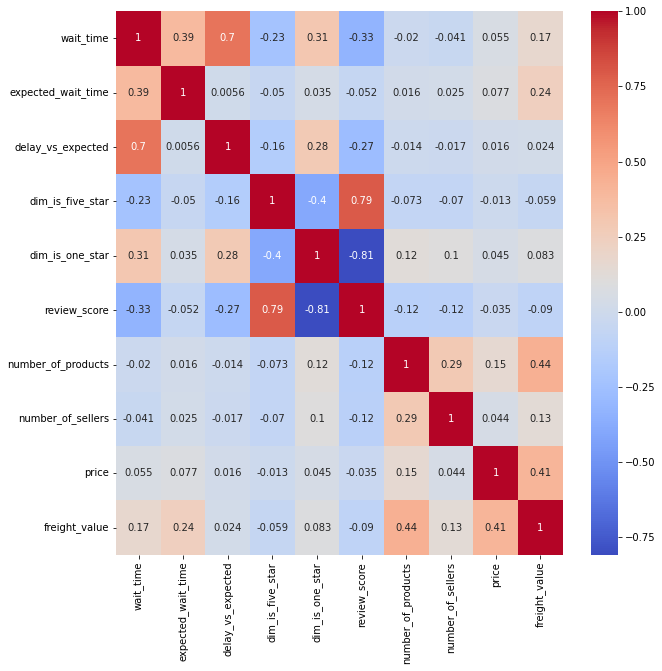

In [17]:
plt.figure(figsize=(10,10))

sns.heatmap(order_data.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

Based on above's heatmap, the wait time and delay vs expected has a medium correlation with the negative review score.
Wait time corr: -0.33
Delay vs. expected: -0.27

#### Explanatory power of delay vs expected and wait time for review score

In [18]:
#Importing statsmodel and check for a linear regression how much of review score's variance is explained by 
#i) delay vs. expected and ii) wait time
import statsmodels.formula.api as smf

#### Univariate regression with delay vs expected

In [19]:
smf.ols(formula = 'review_score ~ delay_vs_expected', data=order_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7715.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:            -1.5717e+05
No. Observations:               96353   AIC:                         3.143e+05
Df Residuals:                   96351   BIC:                         3.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2124      0.004   1043.898      0.000       4.205       4.220
delay_vs_expected    -0.0751      0.001    -87.836      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20752.916   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49852.017
Skew:                          -1.204   Prob(JB):                         0.00
Kurtosis:                       5.573   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Univariate regression with wait_time

In [20]:
smf.ols(formula = 'review_score ~ wait_time', data=order_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:            -1.5519e+05
No. Observations:               96353   AIC:                         3.104e+05
Df Residuals:                   96351   BIC:                         3.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    729.482      0.000       4.711       4.736
wait_time     -0.0453      0.000   -109.902      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19639.914   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35586.515
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.449   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multivariate regression with delay_vs_expected and wait_time as features

In [21]:
smf.ols(formula = 'review_score ~ delay_vs_expected + wait_time', data=order_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6211.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:            -1.5504e+05
No. Observations:               96353   AIC:                         3.101e+05
Df Residuals:                   96350   BIC:                         3.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6500      0.008    602.765      0.000       4.635       4.665
delay_vs_expected    -0.0206      0.001    -17.485      0.000      -0.023      -0.018
wait_time            -0.0382      0.001    -66.018      0.000      -0.039      -0.037
==============================================================================
Omnibus:                    20080.290   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40618.500
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 Even with both wait_time and delay_vs_expected as features, the explanatory power (R-squared) is low. This means there must be a different driver for low reviews

---
#### Multivariate regression with all features

To ensure the features with larger scales are not shown to have much higher importance than lower scaled features, we normalize the values.

In [22]:
#Normalizing values for multivariate regression.

orders_norm = order_data.copy()
features = ["wait_time", "expected_wait_time","delay_vs_expected", "number_of_products", "number_of_sellers","price", "freight_value"]
orders_norm[features] = orders_norm[features].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
orders_norm

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,-0.432084,-0.935929,-0.162119,delivered,0,0,4,-0.264657,-0.112588,-0.514185,-0.653042
1,53cdb2fc8bc7dce0b6741e2150273451,0.133144,-0.525643,-0.162119,delivered,0,0,4,-0.264657,-0.112588,-0.086552,0.000102
2,47770eb9100c2d0c44946d9cf07ec65d,-0.330823,0.330839,-0.162119,delivered,1,0,5,-0.264657,-0.112588,0.112056,-0.164580
3,949d5b44dbf5de918fe9c16f97b45f8a,0.072525,0.279362,-0.162119,delivered,1,0,5,-0.264657,-0.112588,-0.441828,0.206652
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.020282,-1.327755,-0.162119,delivered,1,0,5,-0.264657,-0.112588,-0.562825,-0.653042
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,-0.455195,-0.588472,-0.162119,delivered,1,0,5,-0.264657,-0.112588,-0.311673,-0.450214
96357,63943bddc261676b46f01ca7ac2f7bd8,1.022594,-0.032290,-0.162119,delivered,0,0,4,-0.264657,-0.112588,0.184365,-0.123642
96358,83c1379a015df1e13d02aae0204711ab,1.304464,0.758343,-0.162119,delivered,1,0,5,-0.264657,-0.112588,0.334236,1.966047
96359,11c177c8e97725db2631073c19f07b62,0.482549,1.525669,-0.162119,delivered,0,0,2,1.603238,-0.112588,1.076557,2.717815


In [23]:
model = smf.ols(formula = f"review_score ~ {' + '.join(features)}", data=orders_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2357.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:            -1.5326e+05
No. Observations:               96353   AIC:                         3.065e+05
Df Residuals:                   96345   BIC:                         3.066e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1557      0.004   1086.411      0.000       4.148       4.163
wait_time             -0.4613      0.006    -71.646      0.000      -0.474      -0.449
expected_wait_time     0.1128      0.005     24.545      0.000       0.104       0.122
delay_vs_expected     -0.0308      0.006     -5.221      0.000      -0.042      -0.019
number_of_products    -0.1373      0.004    -30.902      0.000      -0.146      -0.129
number_of_sellers     -0.1347      0.004    -33.647      0.000      -0.143      -0.127
price                 -0.0070      0.004     -1.678      0.093      -0.015       0.001
freight_value          0.0163      0.005      3.393      0.001       0.007       0.026
==============================================================================
Omnibus:                    18852.868   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37213.061
Skew:                          -1.187   Prob(JB):                         0.00
Kurtosis:                       4.905   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The currently included features still only have a low explanatory power with R-squared at 14.6%, <b>thus other features not included so far must be more important.</b>

In [24]:
predicted_revscore = model.predict()

(0.0, 5.5)

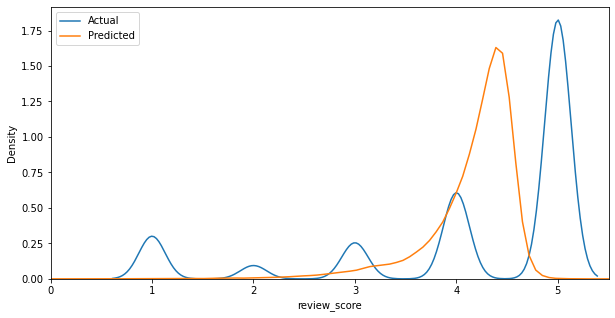

In [25]:
plt.figure(figsize=(10,5))
sns.kdeplot(orders_norm["review_score"], label="Actual")
sns.kdeplot(predicted_revscore, label="Predicted")
plt.legend()
plt.xlim(0,5.5)

KDE confirms that the model's prediction are far off from the actuals

### Sellers/Products as explanation